<a href="https://colab.research.google.com/github/raut803/ML-Project-Model-Practice/blob/main/housepricepredmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('data.csv')

In [ ]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
df.shape

(4600, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [ ]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [ ]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [ ]:
df.drop('date' ,axis=1 ,inplace=True)

df.head()

In [ ]:
df.drop('street' ,axis=1,inplace=True)

In [ ]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,country
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline,USA
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle,USA
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent,USA
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue,USA
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond,USA


In [ ]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
price,1.000000,0.200336,0.327110,0.430410,0.050451,0.151461,0.135648,0.228504,0.034915,0.367570,0.210427,0.021857,-0.028774
bedrooms,0.200336,1.000000,0.545920,0.594884,0.068819,0.177895,-0.003483,0.111028,0.025080,0.484705,0.334165,0.142461,-0.061082
bathrooms,0.327110,0.545920,1.000000,0.761154,0.107837,0.486428,0.076232,0.211960,-0.119994,0.689918,0.298020,0.463498,-0.215886
sqft_living,0.430410,0.594884,0.761154,1.000000,0.210538,0.344850,0.117616,0.311009,-0.062826,0.876443,0.447206,0.287775,-0.122817
sqft_lot,0.050451,0.068819,0.107837,0.210538,1.000000,0.003750,0.017241,0.073907,0.000558,0.216455,0.034842,0.050706,-0.022730
floors,0.151461,0.177895,0.486428,0.344850,0.003750,1.000000,0.022024,0.031211,-0.275013,0.522814,-0.255510,0.467481,-0.233996
waterfront,0.135648,-0.003483,0.076232,0.117616,0.017241,0.022024,1.000000,0.360935,0.000352,0.078911,0.097501,-0.023563,0.008625
view,0.228504,0.111028,0.211960,0.311009,0.073907,0.031211,0.360935,1.000000,0.063077,0.174327,0.321602,-0.064465,0.022967
condition,0.034915,0.025080,-0.119994,-0.062826,0.000558,-0.275013,0.000352,0.063077,1.000000,-0.178196,0.200632,-0.399698,-0.186818
sqft_above,0.367570,0.484705,0.689918,0.876443,0.216455,0.522814,0.078911,0.174327,-0.178196,1.000000,-0.038723,0.408535,-0.160426


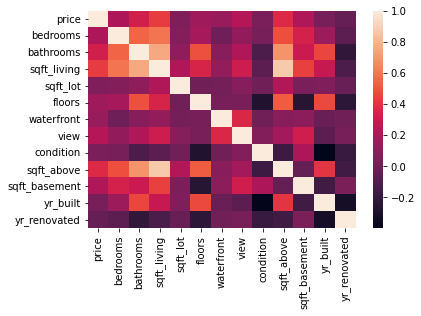

In [ ]:
sns.heatmap(df.corr())

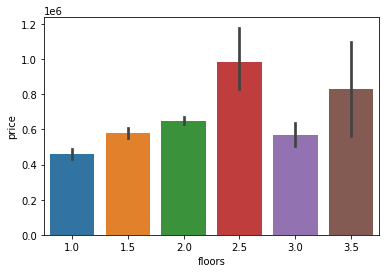

In [ ]:
sns.barplot(x='floors',y='price', data=df )

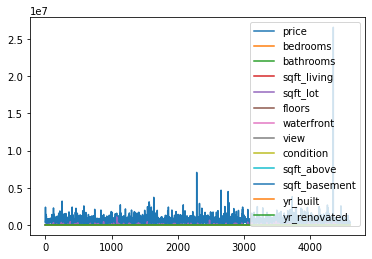

In [ ]:
df.plot(kind='line')


In [ ]:
df2 = pd.get_dummies(df, columns =['city', 'country'])
df2

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point,country_USA
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,...,0,1,0,0,0,0,0,0,0,1
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,...,1,0,0,0,0,0,0,0,0,1
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,...,0,0,0,0,0,0,0,0,0,1
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,...,0,0,0,0,0,0,0,0,0,1
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,...,1,0,0,0,0,0,0,0,0,1
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,...,0,0,0,0,0,0,0,0,0,1
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,...,0,0,0,0,0,0,0,0,0,1
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,...,1,0,0,0,0,0,0,0,0,1


In [ ]:
y = df2.iloc[:,0].values
x = df2.iloc[:,1:].values

In [ ]:
x

array([[3.00e+00, 1.50e+00, 1.34e+03, ..., 0.00e+00, 0.00e+00, 1.00e+00],
       [5.00e+00, 2.50e+00, 3.65e+03, ..., 0.00e+00, 0.00e+00, 1.00e+00],
       [3.00e+00, 2.00e+00, 1.93e+03, ..., 0.00e+00, 0.00e+00, 1.00e+00],
       ...,
       [3.00e+00, 2.50e+00, 3.01e+03, ..., 0.00e+00, 0.00e+00, 1.00e+00],
       [4.00e+00, 2.00e+00, 2.09e+03, ..., 0.00e+00, 0.00e+00, 1.00e+00],
       [3.00e+00, 2.50e+00, 1.49e+03, ..., 0.00e+00, 0.00e+00, 1.00e+00]])

In [ ]:
y

array([ 313000.      , 2384000.      ,  342000.      , ...,
        416904.166667,  203400.      ,  220600.      ])

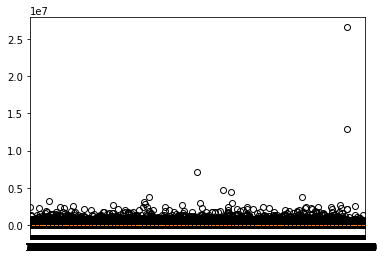

In [ ]:
plt.boxplot(df2,vert=True, patch_artist=True);

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=40)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [ ]:
regressor.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test,y_pred)

0.6364366019834512